# 문장 유형 분류 AI 경진대회

- 대회: https://dacon.io/competitions/official/236037/overview/description

## 데이터 로드 및 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [2]:
file_path = 'data/'
file_name = 'train.csv'
df = pd.read_csv(file_path + file_name)
df_test = pd.read_csv(file_path + 'test.csv')

df.tail()

,ID,문장,유형,극성,시제,확실성,label
16536,TRAIN_16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,TRAIN_16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,TRAIN_16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,TRAIN_16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실
16540,TRAIN_16540,《목민심서》의 내용이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16541 entries, 0 to 16540
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      16541 non-null  object
 1   문장      16541 non-null  object
 2   유형      16541 non-null  object
 3   극성      16541 non-null  object
 4   시제      16541 non-null  object
 5   확실성     16541 non-null  object
 6   label   16541 non-null  object
dtypes: object(7)
memory usage: 904.7+ KB


In [4]:
# ID열 제거
df.drop('ID', axis=1, inplace=True)
df.head()

,문장,유형,극성,시제,확실성,label
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실


### Label 살펴보기

In [5]:
# label 종류 및 수치 확인
print('대화 유형 종류:', df['유형'].value_counts().to_dict())
print('대화 극성 종류:', df['극성'].value_counts().to_dict())
print('대화 시제 종류:', df['시제'].value_counts().to_dict())
print('대화 확실성 종류:', df['확실성'].value_counts().to_dict())

대화 유형 종류: {'사실형': 13558, '추론형': 2151, '대화형': 575, '예측형': 257}
대화 극성 종류: {'긍정': 15793, '부정': 565, '미정': 183}
대화 시제 종류: {'과거': 8032, '현재': 6866, '미래': 1643}
대화 확실성 종류: {'확실': 15192, '불확실': 1349}


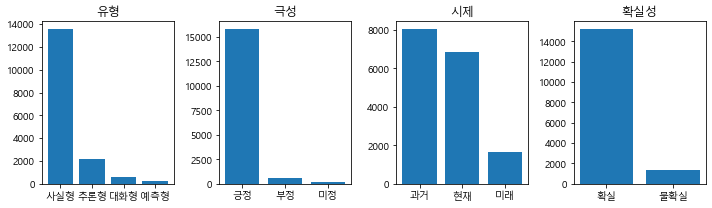

In [6]:
# 각 label 종류와 수치 시각화
# => 매우 불균형
conversation_type = df['유형'].value_counts().to_dict()
conversation_polar = df['극성'].value_counts().to_dict()
conversation_tense = df['시제'].value_counts().to_dict()
conversation_certain = df['확실성'].value_counts().to_dict()

plt.figure(figsize=(10, 3))
# 유형
plt.subplot(1, 4, 1)
plt.bar(conversation_type.keys(), conversation_type.values())
plt.title('유형')

# 극성
plt.subplot(1, 4, 2)
plt.bar(conversation_polar.keys(), conversation_polar.values())
plt.title('극성')

# 시제
plt.subplot(1, 4, 3)
plt.bar(conversation_tense.keys(), conversation_tense.values())
plt.title('시제')

# 확실성
plt.subplot(1, 4, 4)
plt.bar(conversation_certain.keys(), conversation_certain.values())
plt.title('확실성')

plt.tight_layout()
plt.show()

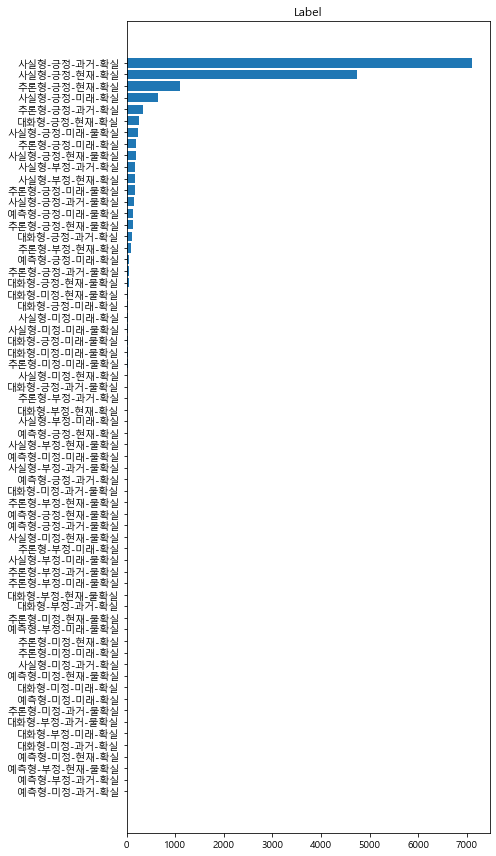

In [7]:
# 전체 label 조합도 매우 불균형
conversation_all = df['label'].value_counts().to_dict()

plt.figure(figsize=(7, 12))
plt.barh(list(conversation_all.keys())[::-1], list(conversation_all.values())[::-1])
plt.title('Label')
plt.tight_layout()
plt.show()

### 결측치 및 중복값 확인

In [8]:
# 결측치 확인 => 결측치는 없다
df.isna().sum()

문장       0
유형       0
극성       0
시제       0
확실성      0
label    0
dtype: int64

In [9]:
# 중복값 확인 => 31개 존재
print(df.duplicated().sum())

31


In [10]:
# 중복데이터 확인
dup = df.duplicated()
dup = df[dup]['문장'].tolist()
df[df['문장'] == dup[0]]

,문장,유형,극성,시제,확실성,label
300,신용카드 빚을 뜻하는 판매신용은 2조4000억원 늘어난 91조1000억원이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1638,신용카드 빚을 뜻하는 판매신용은 2조4000억원 늘어난 91조1000억원이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실


In [11]:
# 중복 제거
df = df.drop_duplicates()

In [12]:
# label이 다르지만 같은 문장 존재
sent_dup = df[df['문장'].duplicated()]['문장'].tolist()
df[df['문장'] == sent_dup[3]]

,문장,유형,극성,시제,확실성,label
2108,직접적으로 암 덩어리를 없애거나 크기를 줄이고 암세포를 죽이기 위한 치료다.,사실형,긍정,현재,불확실,사실형-긍정-현재-불확실
15167,직접적으로 암 덩어리를 없애거나 크기를 줄이고 암세포를 죽이기 위한 치료다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실


In [13]:
sent_dup

['박근혜 정권에서 블랙리스트에 올라 지난 2014년 타의로 미국으로 떠난 이 부회장은 해외 엔터테인먼트 업계에서 지속적으로 활동해온 것으로 알려졌다.',
 '이들 게임은 국내 구글 플레이 매출 톱10 진입이 예상되는 기대작이다.',
 '각 레이스가 종료되면 ＇우마무스메＇들이 무대에 올라 눈과 귀를 즐겁게하는 공연을 펼친다.',
 '직접적으로 암 덩어리를 없애거나 크기를 줄이고 암세포를 죽이기 위한 치료다.']

### 문장 살펴보기

In [14]:
# 문장길이 확인
sent_len = df['문장'].apply(len)
sent_len.describe()

count    16510.000000
mean        63.842520
std         35.488533
min          7.000000
25%         40.000000
50%         57.000000
75%         79.000000
max        534.000000
Name: 문장, dtype: float64

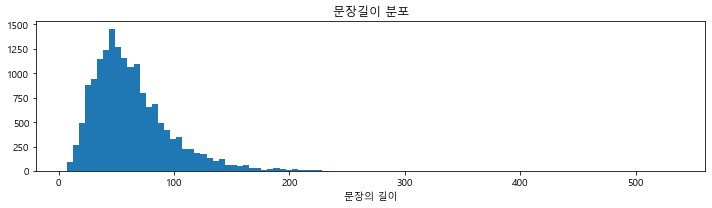

In [15]:
plt.figure(figsize=(10, 3))
plt.hist(sent_len, bins=100)
plt.xlabel('문장의 길이')
plt.title('문장길이 분포')
plt.tight_layout()
plt.show()

In [16]:
print(sent_len[sent_len > 80].count())
print(sent_len[sent_len > 100].count())
print(sent_len[sent_len > 120].count())
print(sent_len[sent_len > 150].count())
print(sent_len[sent_len > 200].count())
print(sent_len[sent_len > 250].count())

3959
2081
1106
443
125
31


In [17]:
# 랜덤으로 5개 문장 확인
for i in range(5):
    print(df.sample(5)['문장'].to_list()[i])

대개 운율이 없고 밋밋한 산문이지만 그 쾌감은 강력하다.
중후장대 산업인 조선, 철강, 중공업, 화학 등이 대표적이었다.
＇스타의거리＇에서는 하트조각을 소모해 게임 진행에 필요한 행동력인 ＇하트＇도 획득할 수 있다.
상속 대상자와 상속 비율을 일률적으로 정해놓은 현행 유류분 제도는 헌법이 보장한 재산권을 심각하게 침해한다.
2020년 새해 첫날부터 전국 곳곳에서 교통사고가 일어났다.
